7130ICT - Data Analytics

Trimester 1 - 2021

s5172620 - Julio Pimentel Albores

s - Gabriela Monteiro

Due: Friday, 28 May 2021


# Assignment 1

## Part 1 –Basic analysis [10 points]

### 1) Describe the dataset.

In [2]:
#import libraries
import pandas as pd
import gzip

In [3]:
#Amazon Review Dataset
#Electronics category

#Pandas data frame
#These functions read the data into a pandas data frame (http://jmcauley.ucsd.edu/data/amazon/)
    
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

reviews_df = getDF('reviews_Electronics_5.json.gz')

reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [16]:
# We are going to use only reviewerID for review references.

print("The shape of the dataset is {:,} rows and {} columns".format(reviews_df.shape[0],reviews_df.shape[1]))
print("The oldest post is from:", reviews_df['reviewTime'].min())
print("The newest post is from:", reviews_df['reviewTime'].max())
print("There are {:,} unique users ID who left a review.".format(reviews_df['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(reviews_df['reviewerName'].nunique()))
print("There are {:,} unique items.".format(reviews_df['asin'].nunique()))
print("The average rating given by customers is {:.2f}".format(reviews_df['overall'].mean()))

The shape of the dataset is 1,689,188 rows and 9 columns
The oldest post is from: 01 1, 2000
The newest post is from: 12 9, 2013
There are 192,403 unique users ID who left a review.
There are 162,859 unique users Names who left a review.
There are 63,001 unique items.
The average rating given by customers is 4.22


In [17]:
#statistical information of float/int columns
#overall values are between 1 and 5 with a mean of 4.22
#unixReviewTime is an int value of date time. It needs to be transformed.

reviews_df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


In [18]:
#most of the attributes types are object. However, overall and unixReviewTime have a numerical structure. 

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 128.9+ MB


In [19]:
# As seen above, the column reviewerName has some null-values which can be confirmed by: 
reviews_df['reviewerName'].isna().sum()

24730

### Data cleaning 

In [20]:
#new attribute created with datetime format
reviews_df["timeFormat"] = pd.to_datetime(reviews_df["unixReviewTime"], unit='s')

In [12]:
#check the column "timeFormat" makes sense with the column "reviewTime"
reviews_df.head()

#the most relevant attributes are: reviewerID, reviewerName, overall, and timeFormat
#reviewText and summary have interesting information but it is unstructured
#the hypothesis is that we can predict the rating of a product based on item or user approach

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",2013-06-02
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",2010-11-25
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",2010-09-09
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",2010-11-24
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",2011-09-29


In [22]:
# Now, we will look at the electronics metadata
metadata_df = getDF('meta_Electronics.json.gz')

metadata_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [23]:
metadata_df.shape

(498196, 9)

In [24]:
# we will merge both dataframes using the product ID (asin) as a unifier.
# we will save the merged dataframe in a new variable called df
df_electronics = pd.merge(reviews_df, metadata_df, how='inner', on='asin')

In [25]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",2013-06-02,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",2010-11-25,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",2010-09-09,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",2010-11-24,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",2011-09-29,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [26]:
# As expected, the merged dataframe has the same number of rows, but has 18 columns.

df_electronics.shape

(1689188, 18)

In [27]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   reviewerID      1689188 non-null  object        
 1   asin            1689188 non-null  object        
 2   reviewerName    1664458 non-null  object        
 3   helpful         1689188 non-null  object        
 4   reviewText      1689188 non-null  object        
 5   overall         1689188 non-null  float64       
 6   summary         1689188 non-null  object        
 7   unixReviewTime  1689188 non-null  int64         
 8   reviewTime      1689188 non-null  object        
 9   timeFormat      1689188 non-null  datetime64[ns]
 10  imUrl           1687975 non-null  object        
 11  description     1655511 non-null  object        
 12  categories      1689188 non-null  object        
 13  title           1643686 non-null  object        
 14  price           16

In [28]:
# source: https://datatofish.com/count-nan-pandas-dataframe/
# There are 45502 product titles that are null-values, as confirmed by:
df_electronics['title'].isna().sum()

45502

In [29]:
# Instead of dropping the observations that are null, we will reasign the dataframe with all rows that do not have
# null values in the column 'title':
# source: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=%23%20delete%20a%20few%20specified%20rows,always%20align%20to%20row%20numbers.&text=It%20can%20be%20useful%20for,have%20a%20more%20meaningful%20index.
df_electronics = df_electronics.loc[df_electronics['title'].isna() != True]

In [30]:
# Now, if we check the dataframe again, we will see that, as expected, there are no more null values in the column title.
df_electronics['title'].isna().sum()

0

In [34]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",2013-06-02,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",2010-11-25,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",2010-09-09,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",2010-11-24,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",2011-09-29,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


### Creation of pkl file 

In [41]:
#There are 81,453 products related to "ipad"
df_electronics[df_electronics['title'].str.contains("ipad")].shape

(81453, 18)

In [42]:
#however, only 15,871 of 81,453 (19%) are related to "tablet" as well. 
ipad=df_electronics[df_electronics['title'].str.contains("ipad")]

ipad[ipad['title'].str.contains("tablet")].shape

(15871, 18)

In [43]:
#We transform the 'title' column in lower case. 
df_electronics['title']=df_electronics['title'].str.lower()

# Now we want to filter out the observations containing the keywords: 'tablet' and "ipad"
df_tablet = df_electronics[df_electronics['title'].str.contains("tablet") | df_electronics['title'].str.contains("ipad")]

#We can use the file assignment_tablet_data.pkl to avoid loading the whole electronics dataset
df_tablet.to_pickle('assignment_tablet_data.pkl')

## Part 2: Advance analysis 

For this section, we would only require the pkl file, rather than ratings and metadata datasets. 

In [56]:
import pandas as pd
import numpy as np

#read pkl file of tablet and ipad items. 
df = pd.read_pickle('assignment_tablet_data.pkl')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135939 entries, 237 to 1689141
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      135939 non-null  object        
 1   asin            135939 non-null  object        
 2   reviewerName    134726 non-null  object        
 3   helpful         135939 non-null  object        
 4   reviewText      135939 non-null  object        
 5   overall         135939 non-null  float64       
 6   summary         135939 non-null  object        
 7   unixReviewTime  135939 non-null  int64         
 8   reviewTime      135939 non-null  object        
 9   timeFormat      135939 non-null  datetime64[ns]
 10  imUrl           135939 non-null  object        
 11  description     131393 non-null  object        
 12  categories      135939 non-null  object        
 13  title           135939 non-null  object        
 14  price           134910 non-null  

In [57]:
df.describe()


,overall,unixReviewTime,price
count,135939.000000,1.359390e+05,134910.000000
mean,4.190247,1.366043e+09,45.278070
std,1.170919,3.096553e+07,81.089161
min,1.000000,1.010966e+09,0.010000
25%,4.000000,1.352506e+09,9.950000
50%,5.000000,1.371773e+09,17.990000
75%,5.000000,1.389658e+09,38.440000
max,5.000000,1.406074e+09,850.000000


### Filtering accesories

In [58]:
# We can see that there are items which have a very low price and probably are accessories. So we have to get hid of
# them for our analysis, which will mainly focus on tablets and not it's accessories. 
# After checking the amazon website, it was noticed that the prices lower than 250 are include lots of accessories. 
# Therefore, this will be out cut line.
# amazon website: https://www.amazon.com.br/s?keywords=Tablets&i=computers&rh=n%3A16364762011%2Cp_36%3A17270935011&dc&_encoding=UTF8&c=ts&qid=1618802074&rnid=17270933011&ts_id=16364762011&ref=sr_nr_p_36_2

# Here we filter only the reviews for products costing more than 250 and reasign our variable df_tablet with these observations.

df = df[df['price']>250]

df.describe()

,overall,unixReviewTime,price
count,5822.000000,5.822000e+03,5822.000000
mean,4.185847,1.356505e+09,364.508822
std,1.206758,3.762778e+07,104.932877
min,1.000000,1.122941e+09,254.990000
25%,4.000000,1.329350e+09,279.990000
50%,5.000000,1.362960e+09,349.990000
75%,5.000000,1.388016e+09,419.000000
max,5.000000,1.406074e+09,850.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 123734 to 1688828
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      5822 non-null   object        
 1   asin            5822 non-null   object        
 2   reviewerName    5817 non-null   object        
 3   helpful         5822 non-null   object        
 4   reviewText      5822 non-null   object        
 5   overall         5822 non-null   float64       
 6   summary         5822 non-null   object        
 7   unixReviewTime  5822 non-null   int64         
 8   reviewTime      5822 non-null   object        
 9   timeFormat      5822 non-null   datetime64[ns]
 10  imUrl           5822 non-null   object        
 11  description     5817 non-null   object        
 12  categories      5822 non-null   object        
 13  title           5822 non-null   object        
 14  price           5822 non-null   float64       
 

In [60]:
print("The shape of the dataset is {:,} rows and {} columns".format(df.shape[0],df.shape[1]))
print("The oldest post is from:", df['reviewTime'].min())
print("The newest post is from:", df['reviewTime'].max())
print("There are {:,} unique users ID who left a review.".format(df['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(df['reviewerName'].nunique()))
print("The average rating given by customers is {:.2f}".format(df['overall'].mean()))

The shape of the dataset is 5,822 rows and 18 columns
The oldest post is from: 01 1, 2008
The newest post is from: 12 9, 2013
There are 5,306 unique users ID who left a review.
There are 4,996 unique users Names who left a review.
The average rating given by customers is 4.19


In [61]:
# We can see that there are 2738 non null values for brand (out of 4180 observations). 
# In order to solve this problem we will fill in the blank cells from the brand using the 
# first words from the title of the product, which we can see below:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",NaN


### Creating new columns 

In [62]:
def generate_brand(product_title):
    """
    Takes the title of the product in the title column and uses the
    first word in order to populate the null cells in the 'brand' column.
    """
    generated_brand = product_title.split()[0]
    return generated_brand


# Now, we can use the pandas apply function to apply to generate values to the newly created  column.    
df['brand'].fillna(value=df['title'].apply(generate_brand), inplace=True)



df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom


In [63]:
df["response"]=np.where(df["overall"]>3,1,0)

In [64]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand,response
123734,A1LIHSIZX7XMFI,B00030097G,"1elementin7groups ""Dave""","[1, 1]",I use this with both Corel Painter and Photosh...,5.0,A must for Corel Painter,1258243200,"11 15, 2009",2009-11-15,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom,1
123735,A1SK74JE9P6T2Z,B00030097G,Amazon Customer,"[15, 16]",Great product for anyone that has to spend lot...,4.0,saved my messed up wrists...,1122940800,"08 2, 2005",2005-08-02,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom,1
123736,A2P0JWQ7NAH8KQ,B00030097G,"Amazon Customer ""K.T""","[0, 0]",this is the real deal... simply... don't go ch...,5.0,perfection in action,1236038400,"03 3, 2009",2009-03-03,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom,1
123737,A1JY3R1T6Y209Z,B00030097G,BEST F'ING REVIEWER TO REVIEW,"[1, 1]","Quality product, functions great (more than i ...",5.0,own a Intuos and never look back!,1304035200,"04 29, 2011",2011-04-29,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom,1
123738,A168KEW1CICAR1,B00030097G,"Bet ""gadget getter""","[1, 1]",Love it! I've gotten so used to using the sty...,5.0,graphic tablet,1185494400,"07 27, 2007",2007-07-27,http://ecx.images-amazon.com/images/I/41VN48GY...,From the ManufacturerIntuos3 gives you the pow...,"[[Electronics, Computers & Accessories, Cables...",wacom intuos3 6 x 8-inch pen tablet,305.95,{},"{'also_bought': ['B00083Y85C', '0955153077', '...",wacom,1


Text(0.5, 0, '')

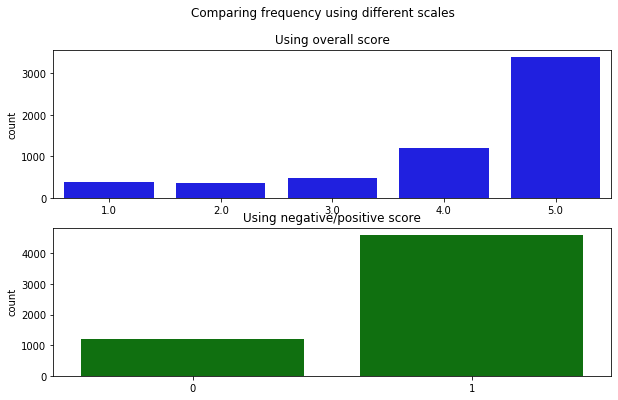

In [110]:
#import seaborn and matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing frequency using different scales")

#First ax title
ax[0].set_title("Using overall score")
#plot frequency count of overall score
sns.countplot(ax=ax[0],x="overall",data=df,color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("Using negative/positive score")
#ax[1].set_xtitle("")
#plot frequency count of response score
sns.countplot(ax=ax[1],x="response",data=df,color="g")
ax[1].set_xlabel("")



### TF-IDF analysis

In [166]:
#libraries for data analytics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#Each item on the list is a review
review_words= [x.strip() for x in df["reviewText"]]
review_words[:10]

["I use this with both Corel Painter and Photoshop CS4. After a week of use I was sold on the Wacom Intuos3. The 6x8 pad is huge and I'm glad I did not get the larger one.Pros: very well built, pen is the most useful device. I love the way I can now pinpoint a touch up like the whites of an eye in a photograph.Cons: the mouse has a cheap feel to it and is slow. So I use a wireless Logitech mouse on the pad that seems to work better for me.Other thoughts: I ordered one before this with Free Shipping from Amazon. It did not arrive, lost somewhere between Sacramento and my house. Amazon refunded the money but it was frustrating.",
 'Great product for anyone that has to spend lots of time using a mouse on the computer.  The only problem with it is that it doesn\'t "wake up" from sleep with my mac running tiger.  You have to unplug and re-plug to get it going.My carpal tunnel hasn\'t acted up once since i started using this tablet.',
 "this is the real deal... simply... don't go cheap, cuz 

In [178]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an = tfidf.fit(review_words)
#transform to document-term matrix
corpus_tf_idf = tfidf_an.transform(review_words) 

sum_words_idf = corpus_tf_idf.sum(axis=0)
words_freq_idf = [(word, sum_words_idf[0, idx]) for word, idx in tfidf_an.vocabulary_.items()]

tfidf_df=pd.DataFrame(words_freq_idf,columns=["Word","Count"])
tfidf_df=tfidf_df.sort_values(by="Count",ascending=False)

tfidf_df.head(10)

,Word,Count
1380,ipad,307.491456
71,tablet,297.433875
0,use,180.875404
49,great,170.416221
100,screen,156.796739
24,like,150.494189
106,just,142.690142
1371,apple,137.418609
83,good,134.753073
20,love,122.588410


In [183]:
#intialise countvectoriser; stop words in English
cv = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an=cv.fit_transform(review_words)

#get the word names
sum_words_tf=cv.get_feature_names()
#term frequency of each word
count_words_tf=tf_an.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df=pd.DataFrame(list(zip(sum_words_tf,count_words_tf)),columns=["Word","Count"])
tf_df=tf_df.sort_values(by="Count",ascending=False)

tf_df.head(10)

,Word,Count
21234,tablet,10222
11927,ipad,9725
23085,use,5617
18924,screen,5212
12933,like,4747
12338,just,4441
10143,great,3675
2626,apps,3456
9966,good,3321
2565,apple,3115


Text(0.5, 0, '')

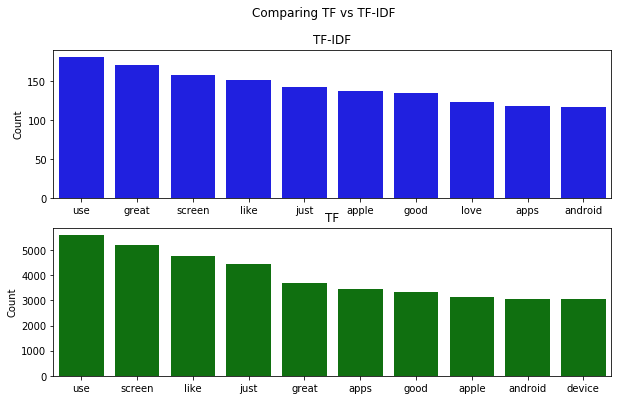

In [200]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing TF vs TF-IDF")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### Positive score

In [202]:
#Each item on the list is a review

df_pos=df[df["response"]==1]

review_words_pos= [x.strip() for x in df_pos["reviewText"]]
review_words_pos[:10]

["I use this with both Corel Painter and Photoshop CS4. After a week of use I was sold on the Wacom Intuos3. The 6x8 pad is huge and I'm glad I did not get the larger one.Pros: very well built, pen is the most useful device. I love the way I can now pinpoint a touch up like the whites of an eye in a photograph.Cons: the mouse has a cheap feel to it and is slow. So I use a wireless Logitech mouse on the pad that seems to work better for me.Other thoughts: I ordered one before this with Free Shipping from Amazon. It did not arrive, lost somewhere between Sacramento and my house. Amazon refunded the money but it was frustrating.",
 'Great product for anyone that has to spend lots of time using a mouse on the computer.  The only problem with it is that it doesn\'t "wake up" from sleep with my mac running tiger.  You have to unplug and re-plug to get it going.My carpal tunnel hasn\'t acted up once since i started using this tablet.',
 "this is the real deal... simply... don't go cheap, cuz 

In [203]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_pos = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an_pos = tfidf_pos.fit(review_words_pos)
#transform to document-term matrix
corpus_tf_idf_pos = tfidf_an_pos.transform(review_words_pos) 

sum_words_idf_pos = corpus_tf_idf_pos.sum(axis=0)
words_freq_idf_pos = [(word, sum_words_idf_pos[0, idx]) for word, idx in tfidf_an_pos.vocabulary_.items()]

tfidf_df_pos=pd.DataFrame(words_freq_idf_pos,columns=["Word","Count"])
tfidf_df_pos=tfidf_df_pos.sort_values(by="Count",ascending=False)

tfidf_df_pos.head(10)

,Word,Count
1283,ipad,253.148368
71,tablet,236.267224
0,use,150.791563
49,great,148.249702
100,screen,121.197489
24,like,121.124455
106,just,110.917429
83,good,110.333065
1306,apple,109.893859
20,love,109.808059


In [211]:
#intialise countvectoriser; stop words in English
cv_pos = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_pos=cv_pos.fit_transform(review_words_pos)

#get the word names
sum_words_tf_pos=cv_pos.get_feature_names()
#term frequency of each word
count_words_tf_pos=tf_an_pos.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_pos=pd.DataFrame(list(zip(sum_words_tf_pos,count_words_tf_pos)),columns=["Word","Count"])
tf_df_pos=tf_df_pos.sort_values(by="Count",ascending=False)

tf_df_pos.head(10)

,Word,Count
10408,ipad,7870
18566,tablet,7849
20175,use,4566
16552,screen,3915
11300,like,3734
10760,just,3335
8851,great,3197
2235,apps,2844
8689,good,2607
2012,android,2448


Text(0.5, 0, '')

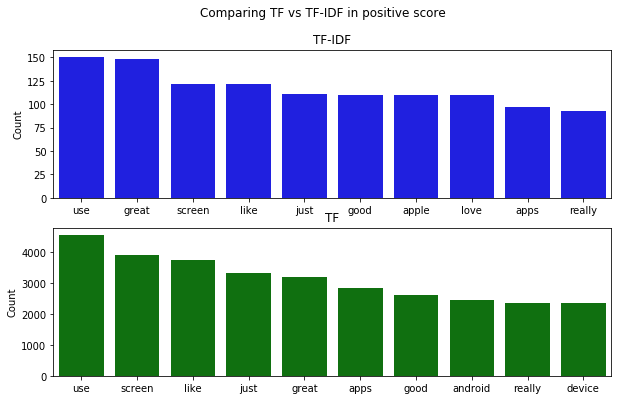

In [212]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing TF vs TF-IDF in positive score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_pos.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_pos.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### Negative scores

In [208]:
#Each item on the list is a review

df_neg=df[df["response"]==0]

review_words_neg= [x.strip() for x in df_neg["reviewText"]]
review_words_neg[:10]

['The reason I\'m giving this tablet two stars is to call attention to this model\'s design flaw, which is the USB cable/port. Although tablets are a great addition to the graphics professional, and one you really can\'t work w/o, the Intuous USB cable will eventually fail internally (This happens on the Intuous 4 also). It\'s simply lacking in quality control. Mine started failing after 2 years and now has completely failed. The Intuous 4 USB port has a similar quality control issue.Everything else about this tablet is 5 stars, but you can\'t use it w/o the cable. And for quality control issues, it gets a three star reduction. When you buy an Intuous, just be aware that you may be replacing it after a couple of years, and according to searches for "Intuous 4 USB port", perhaps a year before failure.Edit:11/24/2011After first writing this review, I disassembled the tablet and resoldered the USB connection. It worked fine until just a few weeks ago.My Intuos 3 has now failed completely 

In [209]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_neg = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an_neg = tfidf_neg.fit(review_words_neg)
#transform to document-term matrix
corpus_tf_idf_neg = tfidf_an_neg.transform(review_words_neg) 

sum_words_idf_neg = corpus_tf_idf_neg.sum(axis=0)
words_freq_idf_neg = [(word, sum_words_idf_neg[0, idx]) for word, idx in tfidf_an_neg.vocabulary_.items()]

tfidf_df_neg=pd.DataFrame(words_freq_idf_neg,columns=["Word","Count"])
tfidf_df_neg=tfidf_df_neg.sort_values(by="Count",ascending=False)

tfidf_df_neg.head(10)

,Word,Count
2,tablet,64.977305
297,ipad,56.105578
118,screen,37.543479
40,just,33.521676
997,asus,32.157973
34,use,31.851440
239,like,31.106832
205,apple,29.119064
165,good,25.960988
85,device,25.483210


In [213]:
#intialise countvectoriser; stop words in English
cv_neg = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_neg=cv_neg.fit_transform(review_words_neg)

#get the word names
sum_words_tf_neg=cv_neg.get_feature_names()
#term frequency of each word
count_words_tf_neg=tf_an_neg.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_neg=pd.DataFrame(list(zip(sum_words_tf_neg,count_words_tf_neg)),columns=["Word","Count"])
tf_df_neg=tf_df_neg.sort_values(by="Count",ascending=False)

tf_df_neg.head(10)

,Word,Count
10432,tablet,2373
5798,ipad,1855
9248,screen,1297
5966,just,1106
11270,use,1051
6258,like,1013
1127,apple,795
1267,asus,794
4826,good,714
3187,device,695


Text(0.5, 0, '')

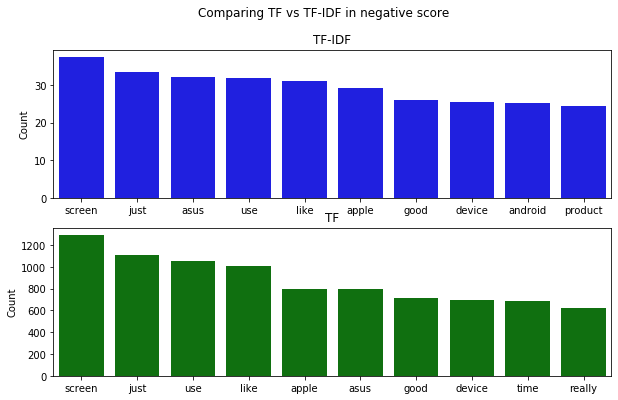

In [214]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing TF vs TF-IDF in negative score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_neg.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_neg.head(12).tail(10),color="g")
ax[1].set_xlabel("")